<a href="https://colab.research.google.com/github/wj198414/ASTRON1221/blob/main/DarkMatter/class_demo_orbital_velocity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import astropy.units as u
import astropy.constants as ac
import matplotlib.pyplot as plt

In [2]:
from google.colab import files

In [3]:
upload = files.upload()

Saving galaxy_rotation_2006.txt to galaxy_rotation_2006.txt


In [4]:
import astropy.io.ascii

In [5]:
tab = astropy.io.ascii.read("galaxy_rotation_2006.txt")

(0.0, 300.0)

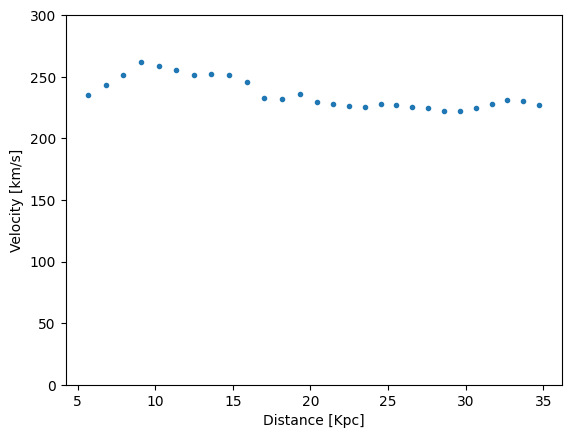

In [6]:
dis = tab["col2"]
vel = tab["col3"]
plt.plot(dis, vel, ".")
plt.xlabel("Distance [Kpc]")
plt.ylabel("Velocity [km/s]")
plt.ylim(0, 300)

In [7]:
def calculate_orbital_velocity(mass, radius):
  return(np.sqrt(ac.G * mass / radius))

In [8]:
mass = 1 * u.earthMass
radius = 1 * u.earthRad
orb_vel = calculate_orbital_velocity(mass, radius)
print(orb_vel.to(u.km / u.s))

7.905388234385281 km / s


In [9]:
mass = 3e7 * u.solMass
radius = 5.68 * 1000 * u.parsec
orb_vel = calculate_orbital_velocity(mass, radius)
print(orb_vel.to(u.km / u.s))

4.766142291386287 km / s


In [10]:
vel_bh = np.zeros(np.shape(dis)) * u.km / u.s
# create a velocity array with the same number of elements as the distance array

for i, radius in enumerate(dis):
  rad = radius * 1000 * u.parsec # what is the difference between rad and radius?
  orb_vel = calculate_orbital_velocity(mass, rad)
  vel_bh[i] = orb_vel
  # print("The orbital velocity at ", radius, " kpc = ", orb_vel.to(u.km / u.s))

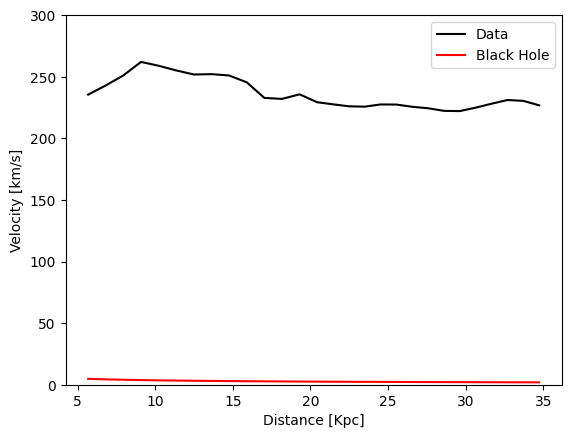

In [11]:
dis = tab["col2"]
vel = tab["col3"]
plt.plot(dis, vel, color="black", label="Data")
plt.plot(dis, vel_bh.value, color="red", label="Black Hole")
plt.xlabel("Distance [Kpc]")
plt.ylabel("Velocity [km/s]")
plt.ylim(0, 300)
plt.legend()

In [14]:
mass_disk = 10e10 * u.solMass
size_disk = 30 * 1000 * u.parsec
rho_disk = mass_disk / (np.pi * size_disk**2)
print(rho_disk.to(u.solMass / u.parsec**2))

35.367765131532295 solMass / pc2


In [15]:
vel_disk = np.zeros(np.shape(dis)) * u.km / u.s
# create a velocity array with the same number of elements as the distance array

for i, radius in enumerate(dis):
  rad = radius * 1000 * u.parsec # what is the difference between rad and radius?
  mass = rho_disk * rad**2
  orb_vel = calculate_orbital_velocity(mass, rad)
  vel_disk[i] = orb_vel
  # print("The orbital velocity at ", radius, " kpc = ", orb_vel.to(u.km / u.s))

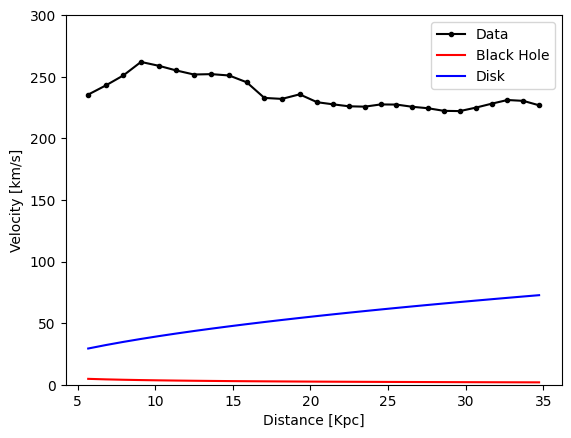

In [18]:
dis = tab["col2"]
vel = tab["col3"]
plt.plot(dis, vel, color="black", label="Data", marker=".")
plt.plot(dis, vel_bh.value, color="red", label="Black Hole")
plt.plot(dis, vel_disk.value, color="blue", label="Disk")

plt.xlabel("Distance [Kpc]")
plt.ylabel("Velocity [km/s]")
plt.ylim(0, 300)
plt.legend()